# Importing Libraries

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from PIL import Image
import random
from shutil import copyfile

# upgrade the 'gdown' package

In [3]:
!pip install --upgrade --no-cache-dir gdown

# Downloading dataset from Google drive

In [4]:
!gdown --id 148rrq_J-xHoUsIcY-UDBFW5ebuEs_1v0

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=148rrq_J-xHoUsIcY-UDBFW5ebuEs_1v0
From (redirected): https://drive.google.com/uc?id=148rrq_J-xHoUsIcY-UDBFW5ebuEs_1v0&confirm=t&uuid=5af31b6a-db87-4281-a461-f3116db24158
To: /kaggle/working/color.zip
100%|████████████████████████████████████████| 692M/692M [00:08<00:00, 79.9MB/s]


In [5]:
!gdown --id 1FDGuCwlsudu93VnwYSGOQ2Dg6NsG8T2l

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1FDGuCwlsudu93VnwYSGOQ2Dg6NsG8T2l
From (redirected): https://drive.google.com/uc?id=1FDGuCwlsudu93VnwYSGOQ2Dg6NsG8T2l&confirm=t&uuid=ce4419a6-4a66-4c32-9861-90f848ca7a5d
To: /kaggle/working/test.zip
100%|█████████████████████████████████████████| 161M/161M [00:01<00:00, 152MB/s]


# Unzipping files

In [ ]:
!unzip /kaggle/working/color.zip

Archive:  /kaggle/working/color.zip
   creating: color/Apple___Apple_scab/
  inflating: color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG  
  inflating: color/Apple___Apple_scab/0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037.JPG  
  inflating: color/Apple___Apple_scab/023123cb-7b69-4c9f-a521-766d7c8543bb___FREC_Scab 3487.JPG  
  inflating: color/Apple___Apple_scab/0261a6e4-21f8-481a-8827-b674e6955644___FREC_Scab 3055.JPG  
  inflating: color/Apple___Apple_scab/029424b0-0ef5-491b-9ef5-069190d24d8f___FREC_Scab 3504.JPG  
  inflating: color/Apple___Apple_scab/03354abb-aa1c-4f9d-a1ef-9f40505cd539___FREC_Scab 3355.JPG  
  inflating: color/Apple___Apple_scab/0340dc35-5215-48ab-8db7-06af99fcb358___FREC_Scab 2966.JPG  
  inflating: color/Apple___Apple_scab/0395b847-2c73-4674-826f-33a6afb5b4fe___FREC_Scab 3287.JPG  
  inflating: color/Apple___Apple_scab/0537ad56-3d24-4e97-a947-65b9b37f8988___FREC_Scab 3079.JPG  
  inflating: color/Apple___Apple_scab/058d5

In [13]:
!unzip /kaggle/working/test.zip

Archive:  /kaggle/working/test.zip
replace test/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


# Starting preprocessing 
# Retrieving directories informations for further processing.

In [11]:
labels_list = os.listdir('/kaggle/working/color')
path, dirs, files = next(os.walk("/kaggle/working/color"))

In [8]:
original_dataset_dir ='/kaggle/working/color'
base_dir = '/kaggle/working/preprossesed-data/'
os.mkdir(base_dir)

In [9]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

# Data Visualization

In [12]:
print("Total disease classes are: {}".format(len(labels_list)))

Total disease classes are: 38


In [17]:
# Number of images for each disease
nums = {}
for disease in labels_list:
    nums[disease] = len(os.listdir(original_dataset_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Grape___Black_rot,982
Potato___healthy,122
Potato___Early_blight,802
Tomato___Tomato_Yellow_Leaf_Curl_Virus,4361
Cherry_(including_sour)___healthy,686
Apple___Cedar_apple_rust,221
"Pepper,_bell___Bacterial_spot",793
Squash___Powdery_mildew,1475
Tomato___Early_blight,802
Tomato___Bacterial_spot,1773


Text(0.5, 1.0, 'Images per each class of plant disease')

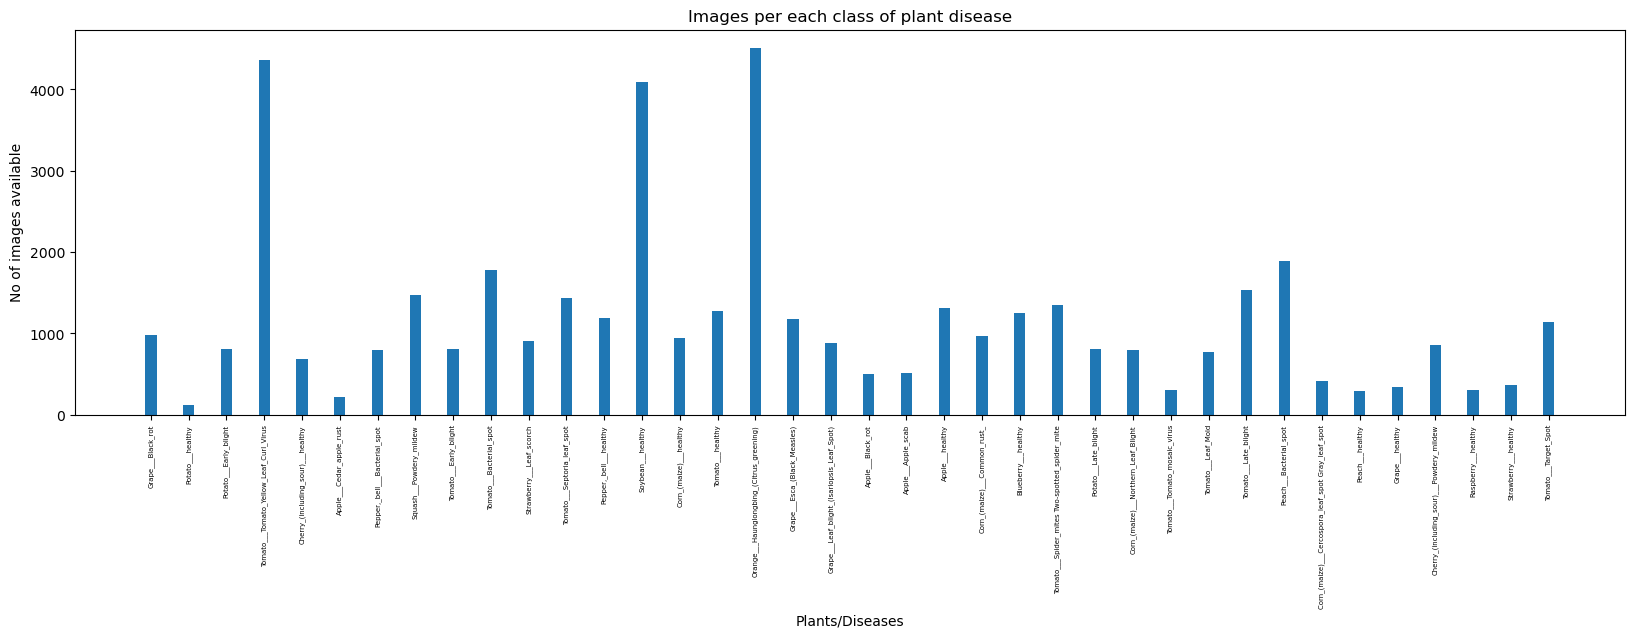

In [18]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, labels_list, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

# Creating directories for training data of different classes.

In [19]:
train_Apple___Apple_scab_dir = os.path.join(train_dir, 'Apple___Apple_scab')
os.mkdir(train_Apple___Apple_scab_dir)

train_Apple___Black_rot_dir = os.path.join(train_dir, 'Apple___Black_rot')
os.mkdir(train_Apple___Black_rot_dir)

train_Apple___Cedar_apple_rust_dir = os.path.join(train_dir, 'Apple___Cedar_apple_rust')
os.mkdir(train_Apple___Cedar_apple_rust_dir)

train_Apple___healthy_dir = os.path.join(train_dir, 'Apple___healthy')
os.mkdir(train_Apple___healthy_dir)

train_Blueberry___healthy_dir = os.path.join(train_dir, 'Blueberry___healthy')
os.mkdir(train_Blueberry___healthy_dir)

train_Cherry_including_sour___healthy_dir = os.path.join(train_dir, 'Cherry_(including_sour)___healthy')
os.mkdir(train_Cherry_including_sour___healthy_dir)

train_Cherry_including_sour___Powdery_mildew_dir = os.path.join(train_dir, 'Cherry_(including_sour)___Powdery_mildew')
os.mkdir(train_Cherry_including_sour___Powdery_mildew_dir)

train_Corn_maize___Cercospora_leaf_spot_Gray_leaf_spot_dir = os.path.join(train_dir, 'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot')
os.mkdir(train_Corn_maize___Cercospora_leaf_spot_Gray_leaf_spot_dir)

train_Corn_maize___Common_rust__dir = os.path.join(train_dir, 'Corn_(maize)___Common_rust_')
os.mkdir(train_Corn_maize___Common_rust__dir)

train_Corn_maize___healthy_dir = os.path.join(train_dir, 'Corn_(maize)___healthy')
os.mkdir(train_Corn_maize___healthy_dir)

train_Corn_maize___Northern_Leaf_Blight_dir = os.path.join(train_dir, 'Corn_(maize)___Northern_Leaf_Blight')
os.mkdir(train_Corn_maize___Northern_Leaf_Blight_dir)

train_Grape___Black_rot_dir = os.path.join(train_dir, 'Grape___Black_rot')
os.mkdir(train_Grape___Black_rot_dir)

train_Grape___Esca_Black_Measles_dir = os.path.join(train_dir, 'Grape___Esca_(Black_Measles)')
os.mkdir(train_Grape___Esca_Black_Measles_dir)

train_Grape___healthy_dir = os.path.join(train_dir, 'Grape___healthy')
os.mkdir(train_Grape___healthy_dir)

train_Grape___Leaf_blight_Isariopsis_Leaf_Spot_dir = os.path.join(train_dir, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)')
os.mkdir(train_Grape___Leaf_blight_Isariopsis_Leaf_Spot_dir)

train_Orange___Haunglongbing_Citrus_greening_dir = os.path.join(train_dir, 'Orange___Haunglongbing_(Citrus_greening)')
os.mkdir(train_Orange___Haunglongbing_Citrus_greening_dir)

train_Peach___Bacterial_spot_dir = os.path.join(train_dir, 'Peach___Bacterial_spot')
os.mkdir(train_Peach___Bacterial_spot_dir)

train_Peach___healthy_dir = os.path.join(train_dir, 'Peach___healthy')
os.mkdir(train_Peach___healthy_dir)

train_Pepper_bell___Bacterial_spot_dir = os.path.join(train_dir, 'Pepper,_bell___Bacterial_spot')
os.mkdir(train_Pepper_bell___Bacterial_spot_dir)

train_Pepper_bell___healthy_dir = os.path.join(train_dir, 'Pepper,_bell___healthy')
os.mkdir(train_Pepper_bell___healthy_dir)

train_Potato___Early_blight_dir = os.path.join(train_dir, 'Potato___Early_blight')
os.mkdir(train_Potato___Early_blight_dir)

train_Potato___healthy_dir = os.path.join(train_dir, 'Potato___healthy')
os.mkdir(train_Potato___healthy_dir)

train_Potato___Late_blight_dir = os.path.join(train_dir, 'Potato___Late_blight')
os.mkdir(train_Potato___Late_blight_dir)

train_Raspberry___healthy_dir = os.path.join(train_dir, 'Raspberry___healthy')
os.mkdir(train_Raspberry___healthy_dir)

train_Soybean___healthy_dir = os.path.join(train_dir, 'Soybean___healthy')
os.mkdir(train_Soybean___healthy_dir)

train_Squash___Powdery_mildew_dir = os.path.join(train_dir, 'Squash___Powdery_mildew')
os.mkdir(train_Squash___Powdery_mildew_dir)

train_Strawberry___healthy_dir = os.path.join(train_dir, 'Strawberry___healthy')
os.mkdir(train_Strawberry___healthy_dir)

train_Strawberry___Leaf_scorch_dir = os.path.join(train_dir, 'Strawberry___Leaf_scorch')
os.mkdir(train_Strawberry___Leaf_scorch_dir)

train_Tomato___Bacterial_spot_dir = os.path.join(train_dir, 'Tomato___Bacterial_spot')
os.mkdir(train_Tomato___Bacterial_spot_dir)

train_Tomato___Early_blight_dir = os.path.join(train_dir, 'Tomato___Early_blight')
os.mkdir(train_Tomato___Early_blight_dir)

train_Tomato___healthy_dir = os.path.join(train_dir, 'Tomato___healthy')
os.mkdir(train_Tomato___healthy_dir)

train_Tomato___Late_blight_dir = os.path.join(train_dir, 'Tomato___Late_blight')
os.mkdir(train_Tomato___Late_blight_dir)

train_Tomato___Leaf_Mold_dir = os.path.join(train_dir, 'Tomato___Leaf_Mold')
os.mkdir(train_Tomato___Leaf_Mold_dir)

train_Tomato___Septoria_leaf_spot_dir = os.path.join(train_dir, 'Tomato___Septoria_leaf_spot')
os.mkdir(train_Tomato___Septoria_leaf_spot_dir)

train_Tomato___Spider_mites_Two_spotted_spider_mite_dir = os.path.join(train_dir, 'Tomato___Spider_mites Two-spotted_spider_mite')
os.mkdir(train_Tomato___Spider_mites_Two_spotted_spider_mite_dir)

train_Tomato___Target_Spot_dir = os.path.join(train_dir, 'Tomato___Target_Spot')
os.mkdir(train_Tomato___Target_Spot_dir)

train_Tomato___Tomato_mosaic_virus_dir = os.path.join(train_dir, 'Tomato___Tomato_mosaic_virus')
os.mkdir(train_Tomato___Tomato_mosaic_virus_dir)

train_Tomato___Tomato_Yellow_Leaf_Curl_Virus_dir = os.path.join(train_dir, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus')
os.mkdir(train_Tomato___Tomato_Yellow_Leaf_Curl_Virus_dir)

# Creating directories for validation data of different classes.

In [20]:
validation_Apple___Apple_scab_dir = os.path.join(validation_dir, 'Apple___Apple_scab')
os.mkdir(validation_Apple___Apple_scab_dir)

validation_Apple___Black_rot_dir = os.path.join(validation_dir, 'Apple___Black_rot')
os.mkdir(validation_Apple___Black_rot_dir)

validation_Apple___Cedar_apple_rust_dir = os.path.join(validation_dir, 'Apple___Cedar_apple_rust')
os.mkdir(validation_Apple___Cedar_apple_rust_dir)

validation_Apple___healthy_dir = os.path.join(validation_dir, 'Apple___healthy')
os.mkdir(validation_Apple___healthy_dir)

validation_Blueberry___healthy_dir = os.path.join(validation_dir, 'Blueberry___healthy')
os.mkdir(validation_Blueberry___healthy_dir)

validation_Cherry_including_sour___healthy_dir = os.path.join(validation_dir, 'Cherry_(including_sour)___healthy')
os.mkdir(validation_Cherry_including_sour___healthy_dir)

validation_Cherry_including_sour___Powdery_mildew_dir = os.path.join(validation_dir, 'Cherry_(including_sour)___Powdery_mildew')
os.mkdir(validation_Cherry_including_sour___Powdery_mildew_dir)

validation_Corn_maize___Cercospora_leaf_spot_Gray_leaf_spot_dir = os.path.join(validation_dir, 'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot')
os.mkdir(validation_Corn_maize___Cercospora_leaf_spot_Gray_leaf_spot_dir)

validation_Corn_maize___Common_rust__dir = os.path.join(validation_dir, 'Corn_(maize)___Common_rust_')
os.mkdir(validation_Corn_maize___Common_rust__dir)

validation_Corn_maize___healthy_dir = os.path.join(validation_dir, 'Corn_(maize)___healthy')
os.mkdir(validation_Corn_maize___healthy_dir)

validation_Corn_maize___Northern_Leaf_Blight_dir = os.path.join(validation_dir, 'Corn_(maize)___Northern_Leaf_Blight')
os.mkdir(validation_Corn_maize___Northern_Leaf_Blight_dir)

validation_Grape___Black_rot_dir = os.path.join(validation_dir, 'Grape___Black_rot')
os.mkdir(validation_Grape___Black_rot_dir)

validation_Grape___Esca_Black_Measles_dir = os.path.join(validation_dir, 'Grape___Esca_(Black_Measles)')
os.mkdir(validation_Grape___Esca_Black_Measles_dir)

validation_Grape___healthy_dir = os.path.join(validation_dir, 'Grape___healthy')
os.mkdir(validation_Grape___healthy_dir)

validation_Grape___Leaf_blight_Isariopsis_Leaf_Spot_dir = os.path.join(validation_dir, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)')
os.mkdir(validation_Grape___Leaf_blight_Isariopsis_Leaf_Spot_dir)

validation_Orange___Haunglongbing_Citrus_greening_dir = os.path.join(validation_dir, 'Orange___Haunglongbing_(Citrus_greening)')
os.mkdir(validation_Orange___Haunglongbing_Citrus_greening_dir)

validation_Peach___Bacterial_spot_dir = os.path.join(validation_dir, 'Peach___Bacterial_spot')
os.mkdir(validation_Peach___Bacterial_spot_dir)

validation_Peach___healthy_dir = os.path.join(validation_dir, 'Peach___healthy')
os.mkdir(validation_Peach___healthy_dir)

validation_Pepper_bell___Bacterial_spot_dir = os.path.join(validation_dir, 'Pepper,_bell___Bacterial_spot')
os.mkdir(validation_Pepper_bell___Bacterial_spot_dir)

validation_Pepper_bell___healthy_dir = os.path.join(validation_dir, 'Pepper,_bell___healthy')
os.mkdir(validation_Pepper_bell___healthy_dir)

validation_Potato___Early_blight_dir = os.path.join(validation_dir, 'Potato___Early_blight')
os.mkdir(validation_Potato___Early_blight_dir)

validation_Potato___healthy_dir = os.path.join(validation_dir, 'Potato___healthy')
os.mkdir(validation_Potato___healthy_dir)

validation_Potato___Late_blight_dir = os.path.join(validation_dir, 'Potato___Late_blight')
os.mkdir(validation_Potato___Late_blight_dir)

validation_Raspberry___healthy_dir = os.path.join(validation_dir, 'Raspberry___healthy')
os.mkdir(validation_Raspberry___healthy_dir)

validation_Soybean___healthy_dir = os.path.join(validation_dir, 'Soybean___healthy')
os.mkdir(validation_Soybean___healthy_dir)

validation_Squash___Powdery_mildew_dir = os.path.join(validation_dir, 'Squash___Powdery_mildew')
os.mkdir(validation_Squash___Powdery_mildew_dir)

validation_Strawberry___healthy_dir = os.path.join(validation_dir, 'Strawberry___healthy')
os.mkdir(validation_Strawberry___healthy_dir)

validation_Strawberry___Leaf_scorch_dir = os.path.join(validation_dir, 'Strawberry___Leaf_scorch')
os.mkdir(validation_Strawberry___Leaf_scorch_dir)

validation_Tomato___Bacterial_spot_dir = os.path.join(validation_dir, 'Tomato___Bacterial_spot')
os.mkdir(validation_Tomato___Bacterial_spot_dir)

validation_Tomato___Early_blight_dir = os.path.join(validation_dir, 'Tomato___Early_blight')
os.mkdir(validation_Tomato___Early_blight_dir)

validation_Tomato___healthy_dir = os.path.join(validation_dir, 'Tomato___healthy')
os.mkdir(validation_Tomato___healthy_dir)

validation_Tomato___Late_blight_dir = os.path.join(validation_dir, 'Tomato___Late_blight')
os.mkdir(validation_Tomato___Late_blight_dir)

validation_Tomato___Leaf_Mold_dir = os.path.join(validation_dir, 'Tomato___Leaf_Mold')
os.mkdir(validation_Tomato___Leaf_Mold_dir)

validation_Tomato___Septoria_leaf_spot_dir = os.path.join(validation_dir, 'Tomato___Septoria_leaf_spot')
os.mkdir(validation_Tomato___Septoria_leaf_spot_dir)

validation_Tomato___Spider_mites_Two_spotted_spider_mite_dir = os.path.join(validation_dir, 'Tomato___Spider_mites Two-spotted_spider_mite')
os.mkdir(validation_Tomato___Spider_mites_Two_spotted_spider_mite_dir)

validation_Tomato___Target_Spot_dir = os.path.join(validation_dir, 'Tomato___Target_Spot')
os.mkdir(validation_Tomato___Target_Spot_dir)

validation_Tomato___Tomato_mosaic_virus_dir = os.path.join(validation_dir, 'Tomato___Tomato_mosaic_virus')
os.mkdir(validation_Tomato___Tomato_mosaic_virus_dir)

validation_Tomato___Tomato_Yellow_Leaf_Curl_Virus_dir = os.path.join(validation_dir, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus')
os.mkdir(validation_Tomato___Tomato_Yellow_Leaf_Curl_Virus_dir)

# Organize dataset paths for training and validation

In [21]:
Apple___Apple_scab_SOURCE_DIR = '/kaggle/working/color/Apple___Apple_scab'
TRAINING_Apple___Apple_scab_DIR = '/kaggle/working/preprossesed-data/train/Apple___Apple_scab'
VALID_Apple___Apple_scab_DIR = '/kaggle/working/preprossesed-data/validation/Apple___Apple_scab'

Apple___Black_rot_SOURCE_DIR = '/kaggle/working/color/Apple___Black_rot'
TRAINING_Apple___Black_rot_DIR = '/kaggle/working/preprossesed-data/train/Apple___Black_rot'
VALID_Apple___Black_rot_DIR = '/kaggle/working/preprossesed-data/validation/Apple___Black_rot'

Apple___Cedar_apple_rust_SOURCE_DIR = '/kaggle/working/color/Apple___Cedar_apple_rust'
TRAINING_Apple___Cedar_apple_rust_DIR = '/kaggle/working/preprossesed-data/train/Apple___Cedar_apple_rust'
VALID_Apple___Cedar_apple_rust_DIR = '/kaggle/working/preprossesed-data/validation/Apple___Cedar_apple_rust'

Apple___healthy_SOURCE_DIR = '/kaggle/working/color/Apple___healthy'
TRAINING_Apple___healthy_DIR = '/kaggle/working/preprossesed-data/train/Apple___healthy'
VALID_Apple___healthy_DIR = '/kaggle/working/preprossesed-data/validation/Apple___healthy'

Blueberry___healthy_SOURCE_DIR = '/kaggle/working/color/Blueberry___healthy'
TRAINING_Blueberry___healthy_DIR = '/kaggle/working/preprossesed-data/train/Blueberry___healthy'
VALID_Blueberry___healthy_DIR = '/kaggle/working/preprossesed-data/validation/Blueberry___healthy'

Cherry_including_sour___healthy_SOURCE_DIR = '/kaggle/working/color/Cherry_(including_sour)___healthy'
TRAINING_Cherry_including_sour___healthy_DIR = '/kaggle/working/preprossesed-data/train/Cherry_(including_sour)___healthy'
VALID_Cherry_including_sour___healthy_DIR = '/kaggle/working/preprossesed-data/validation/Cherry_(including_sour)___healthy'

Cherry_including_sour___Powdery_mildew_SOURCE_DIR = '/kaggle/working/color/Cherry_(including_sour)___Powdery_mildew'
TRAINING_Cherry_including_sour___Powdery_mildew_DIR = '/kaggle/working/preprossesed-data/train/Cherry_(including_sour)___Powdery_mildew'
VALID_Cherry_including_sour___Powdery_mildew_DIR = '/kaggle/working/preprossesed-data/validation/Cherry_(including_sour)___Powdery_mildew'

Corn_maize___Cercospora_leaf_spot_Gray_leaf_spot_SOURCE_DIR = '/kaggle/working/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
TRAINING_Corn_maize___Cercospora_leaf_spot_Gray_leaf_spot_DIR = '/kaggle/working/preprossesed-data/train/Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot'
VALID_Corn_maize___Cercospora_leaf_spot_Gray_leaf_spot_DIR = '/kaggle/working/preprossesed-data/validation/Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot'

Corn_maize___Common_rust__SOURCE_DIR = '/kaggle/working/color/Corn_(maize)___Common_rust_'
TRAINING_Corn_maize___Common_rust__DIR = '/kaggle/working/preprossesed-data/train/Corn_(maize)___Common_rust_'
VALID_Corn_maize___Common_rust__DIR = '/kaggle/working/preprossesed-data/validation/Corn_(maize)___Common_rust_'

Corn_maize___healthy_SOURCE_DIR = '/kaggle/working/color/Corn_(maize)___healthy'
TRAINING_Corn_maize___healthy_DIR = '/kaggle/working/preprossesed-data/train/Corn_(maize)___healthy'
VALID_Corn_maize___healthy_DIR = '/kaggle/working/preprossesed-data/validation/Corn_(maize)___healthy'

Corn_maize___Northern_Leaf_Blight_DIR = '/kaggle/working/color/Corn_(maize)___Northern_Leaf_Blight'
TRAINING_Corn_maize___Northern_Leaf_Blight_DIR = '/kaggle/working/preprossesed-data/train/Corn_(maize)___Northern_Leaf_Blight'
VALID_Corn_maize___Northern_Leaf_Blight_DIR = '/kaggle/working/preprossesed-data/validation/Corn_(maize)___Northern_Leaf_Blight'

Grape___Black_rot_SOURCE_DIR = '/kaggle/working/color/Grape___Black_rot'
TRAINING_Grape___Black_rot_DIR = '/kaggle/working/preprossesed-data/train/Grape___Black_rot'
VALID_Grape___Black_rot_DIR = '/kaggle/working/preprossesed-data/validation/Grape___Black_rot'

Grape___Esca_Black_Measles_SOURCE_DIR = '/kaggle/working/color/Grape___Esca_(Black_Measles)'
TRAINING_Grape___Esca_Black_Measles_DIR = '/kaggle/working/preprossesed-data/train/Grape___Esca_(Black_Measles)'
VALID_Grape___Esca_Black_Measles_DIR = '/kaggle/working/preprossesed-data/validation/Grape___Esca_(Black_Measles)'

Grape___healthy_SOURCE_DIR = '/kaggle/working/color/Grape___healthy'
TRAINING_Grape___healthy_DIR = '/kaggle/working/preprossesed-data/train/Grape___healthy'
VALID_Grape___healthy_DIR = '/kaggle/working/preprossesed-data/validation/Grape___healthy'

Grape___Leaf_blight_Isariopsis_Leaf_Spot_SOURCE_DIR = '/kaggle/working/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
TRAINING_Grape___Leaf_blight_Isariopsis_Leaf_Spot_DIR = '/kaggle/working/preprossesed-data/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
VALID_Grape___Leaf_blight_Isariopsis_Leaf_Spot_DIR = '/kaggle/working/preprossesed-data/validation/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'

Orange___Haunglongbing_Citrus_greening_SOURCE_DIR = '/kaggle/working/color/Orange___Haunglongbing_(Citrus_greening)'
TRAINING_Orange___Haunglongbing_Citrus_greening_DIR = '/kaggle/working/preprossesed-data/train/Orange___Haunglongbing_(Citrus_greening)'
VALID_Orange___Haunglongbing_Citrus_greening_DIR = '/kaggle/working/preprossesed-data/validation/Orange___Haunglongbing_(Citrus_greening)'

Peach___Bacterial_spot_SOURCE_DIR = '/kaggle/working/color/Peach___Bacterial_spot'
TRAINING_Peach___Bacterial_spot_DIR = '/kaggle/working/preprossesed-data/train/Peach___Bacterial_spot'
VALID_Peach___Bacterial_spot_DIR = '/kaggle/working/preprossesed-data/validation/Peach___Bacterial_spot'

Peach___healthy_SOURCE_DIR = '/kaggle/working/color/Peach___healthy'
TRAINING_Peach___healthy_DIR = '/kaggle/working/preprossesed-data/train/Peach___healthy'
VALID_Peach___healthy_DIR = '/kaggle/working/preprossesed-data/validation/Peach___healthy'

Pepper_bell___Bacterial_spot_SOURCE_DIR = '/kaggle/working/color/Pepper,_bell___Bacterial_spot'
TRAINING_Pepper_bell___Bacterial_spot_DIR = '/kaggle/working/preprossesed-data/train/Pepper,_bell___Bacterial_spot'
VALID_Pepper_bell___Bacterial_spot_DIR = '/kaggle/working/preprossesed-data/validation/Pepper,_bell___Bacterial_spot'

Pepper_bell___healthy_SOURCE_DIR = '/kaggle/working/color/Pepper,_bell___healthy'
TRAINING_Pepper_bell___healthy_DIR = '/kaggle/working/preprossesed-data/train/Pepper,_bell___healthy'
VALID_Pepper_bell___healthy_DIR = '/kaggle/working/preprossesed-data/validation/Pepper,_bell___healthy'

Potato___Early_blight_SOURCE_DIR = '/kaggle/working/color/Potato___Early_blight'
TRAINING_Potato___Early_blight_DIR = '/kaggle/working/preprossesed-data/train/Potato___Early_blight'
VALID_Potato___Early_blight_DIR = '/kaggle/working/preprossesed-data/validation/Potato___Early_blight'

Potato___healthy_SOURCE_DIR = '/kaggle/working/color/Potato___healthy'
TRAINING_Potato___healthy_DIR = '/kaggle/working/preprossesed-data/train/Potato___healthy'
VALID_Potato___healthy_DIR = '/kaggle/working/preprossesed-data/validation/Potato___healthy'

Potato___Late_blight_SOURCE_DIR = '/kaggle/working/color/Potato___Late_blight'
TRAINING_Potato___Late_blight_DIR = '/kaggle/working/preprossesed-data/train/Potato___Late_blight'
VALID_Potato___Late_blight_DIR = '/kaggle/working/preprossesed-data/validation/Potato___Late_blight'

Raspberry___healthy_SOURCE_DIR = '/kaggle/working/color/Raspberry___healthy'
TRAINING_Raspberry___healthy_DIR = '/kaggle/working/preprossesed-data/train/Raspberry___healthy'
VALID_Raspberry___healthy_DIR = '/kaggle/working/preprossesed-data/validation/Raspberry___healthy'

Soybean___healthy_SOURCE_DIR = '/kaggle/working/color/Soybean___healthy'
TRAINING_Soybean___healthy_DIR = '/kaggle/working/preprossesed-data/train/Soybean___healthy'
VALID_Soybean___healthy_DIR = '/kaggle/working/preprossesed-data/validation/Soybean___healthy'

Squash___Powdery_mildew_SOURCE_DIR = '/kaggle/working/color/Squash___Powdery_mildew'
TRAINING_Squash___Powdery_mildew_DIR = '/kaggle/working/preprossesed-data/train/Squash___Powdery_mildew'
VALID_Squash___Powdery_mildew_DIR = '/kaggle/working/preprossesed-data/validation/Squash___Powdery_mildew'

Strawberry___healthy_SOURCE_DIR = '/kaggle/working/color/Strawberry___healthy'
TRAINING_Strawberry___healthy_DIR = '/kaggle/working/preprossesed-data/train/Strawberry___healthy'
VALID_Strawberry___healthy_DIR = '/kaggle/working/preprossesed-data/validation/Strawberry___healthy'

Strawberry___Leaf_scorch_SOURCE_DIR = '/kaggle/working/color/Strawberry___Leaf_scorch'
TRAINING_Strawberry___Leaf_scorch_DIR = '/kaggle/working/preprossesed-data/train/Strawberry___Leaf_scorch'
VALID_Strawberry___Leaf_scorch_DIR = '/kaggle/working/preprossesed-data/validation/Strawberry___Leaf_scorch'

Tomato___Bacterial_spot_SOURCE_DIR = '/kaggle/working/color/Tomato___Bacterial_spot'
TRAINING_Tomato___Bacterial_spot_DIR = '/kaggle/working/preprossesed-data/train/Tomato___Bacterial_spot'
VALID_Tomato___Bacterial_spot_DIR = '/kaggle/working/preprossesed-data/validation/Tomato___Bacterial_spot'

Tomato___Early_blight_SOURCE_DIR = '/kaggle/working/color/Tomato___Early_blight'
TRAINING_Tomato___Early_blight_DIR = '/kaggle/working/preprossesed-data/train/Tomato___Early_blight'
VALID_Tomato___Early_blight_DIR = '/kaggle/working/preprossesed-data/validation/Tomato___Early_blight'

Tomato___healthy_SOURCE_DIR = '/kaggle/working/color/Tomato___healthy'
TRAINING_Tomato___healthy_DIR = '/kaggle/working/preprossesed-data/train/Tomato___healthy'
VALID_Tomato___healthy_DIR = '/kaggle/working/preprossesed-data/validation/Tomato___healthy'

Tomato___Late_blight_SOURCE_DIR = '/kaggle/working/color/Tomato___Late_blight'
TRAINING_Tomato___Late_blight_DIR = '/kaggle/working/preprossesed-data/train/Tomato___Late_blight'
VALID_Tomato___Late_blight_DIR = '/kaggle/working/preprossesed-data/validation/Tomato___Late_blight'

Tomato___Leaf_Mold_SOURCE_DIR = '/kaggle/working/color/Tomato___Leaf_Mold'
TRAINING_Tomato___Leaf_Mold_DIR = '/kaggle/working/preprossesed-data/train/Tomato___Leaf_Mold'
VALID_Tomato___Leaf_Mold_DIR = '/kaggle/working/preprossesed-data/validation/Tomato___Leaf_Mold'

Tomato___Septoria_leaf_spot_SOURCE_DIR = '/kaggle/working/color/Tomato___Septoria_leaf_spot'
TRAINING_Tomato___Septoria_leaf_spot_DIR = '/kaggle/working/preprossesed-data/train/Tomato___Septoria_leaf_spot'
VALID_Tomato___Septoria_leaf_spot_DIR = '/kaggle/working/preprossesed-data/validation/Tomato___Septoria_leaf_spot'

Tomato___Spider_mites_Two_spotted_spider_mite_SOURCE_DIR = '/kaggle/working/color/Tomato___Spider_mites Two-spotted_spider_mite'
TRAINING_Tomato___Spider_mites_Two_spotted_spider_mite_DIR = '/kaggle/working/preprossesed-data/train/Tomato___Spider_mites Two-spotted_spider_mite'
VALID_Tomato___Spider_mites_Two_spotted_spider_mite_DIR = '/kaggle/working/preprossesed-data/validation/Tomato___Spider_mites Two-spotted_spider_mite'

Tomato___Target_Spot_SOURCE_DIR = '/kaggle/working/color/Tomato___Target_Spot'
TRAINING_Tomato___Target_Spot_DIR = '/kaggle/working/preprossesed-data/train/Tomato___Target_Spot'
VALID_Tomato___Target_Spot_DIR = '/kaggle/working/preprossesed-data/validation/Tomato___Target_Spot'

Tomato___Tomato_mosaic_virus_SOURCE_DIR = '/kaggle/working/color/Tomato___Tomato_mosaic_virus'
TRAINING_Tomato___Tomato_mosaic_virus_DIR = '/kaggle/working/preprossesed-data/train/Tomato___Tomato_mosaic_virus'
VALID_Tomato___Tomato_mosaic_virus_DIR = '/kaggle/working/preprossesed-data/validation/Tomato___Tomato_mosaic_virus'

Tomato___Tomato_Yellow_Leaf_Curl_Virus_SOURCE_DIR = '/kaggle/working/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus'
TRAINING_Tomato___Tomato_Yellow_Leaf_Curl_Virus_DIR = '/kaggle/working/preprossesed-data/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus'
VALID_Tomato___Tomato_Yellow_Leaf_Curl_Virus_DIR = '/kaggle/working/preprossesed-data/validation/Tomato___Tomato_Yellow_Leaf_Curl_Virus'


In [22]:
categories = [
    (Apple___Apple_scab_SOURCE_DIR, TRAINING_Apple___Apple_scab_DIR, VALID_Apple___Apple_scab_DIR),
    (Apple___Black_rot_SOURCE_DIR, TRAINING_Apple___Black_rot_DIR, VALID_Apple___Black_rot_DIR),
    (Apple___Cedar_apple_rust_SOURCE_DIR, TRAINING_Apple___Cedar_apple_rust_DIR, VALID_Apple___Cedar_apple_rust_DIR),
    (Apple___healthy_SOURCE_DIR, TRAINING_Apple___healthy_DIR, VALID_Apple___healthy_DIR),
    (Blueberry___healthy_SOURCE_DIR, TRAINING_Blueberry___healthy_DIR, VALID_Blueberry___healthy_DIR),
    (Cherry_including_sour___healthy_SOURCE_DIR, TRAINING_Cherry_including_sour___healthy_DIR, VALID_Cherry_including_sour___healthy_DIR),
    (Cherry_including_sour___Powdery_mildew_SOURCE_DIR, TRAINING_Cherry_including_sour___Powdery_mildew_DIR, VALID_Cherry_including_sour___Powdery_mildew_DIR),
    (Corn_maize___Cercospora_leaf_spot_Gray_leaf_spot_SOURCE_DIR, TRAINING_Corn_maize___Cercospora_leaf_spot_Gray_leaf_spot_DIR, VALID_Corn_maize___Cercospora_leaf_spot_Gray_leaf_spot_DIR),
    (Corn_maize___Common_rust__SOURCE_DIR, TRAINING_Corn_maize___Common_rust__DIR, VALID_Corn_maize___Common_rust__DIR),
    (Corn_maize___healthy_SOURCE_DIR, TRAINING_Corn_maize___healthy_DIR, VALID_Corn_maize___healthy_DIR),
    (Corn_maize___Northern_Leaf_Blight_DIR, TRAINING_Corn_maize___Northern_Leaf_Blight_DIR, VALID_Corn_maize___Northern_Leaf_Blight_DIR),
    (Grape___Black_rot_SOURCE_DIR, TRAINING_Grape___Black_rot_DIR, VALID_Grape___Black_rot_DIR),
    (Grape___Esca_Black_Measles_SOURCE_DIR, TRAINING_Grape___Esca_Black_Measles_DIR, VALID_Grape___Esca_Black_Measles_DIR),
    (Grape___healthy_SOURCE_DIR, TRAINING_Grape___healthy_DIR, VALID_Grape___healthy_DIR),
    (Grape___Leaf_blight_Isariopsis_Leaf_Spot_SOURCE_DIR, TRAINING_Grape___Leaf_blight_Isariopsis_Leaf_Spot_DIR, VALID_Grape___Leaf_blight_Isariopsis_Leaf_Spot_DIR),
    (Orange___Haunglongbing_Citrus_greening_SOURCE_DIR, TRAINING_Orange___Haunglongbing_Citrus_greening_DIR, VALID_Orange___Haunglongbing_Citrus_greening_DIR),
    (Peach___Bacterial_spot_SOURCE_DIR, TRAINING_Peach___Bacterial_spot_DIR, VALID_Peach___Bacterial_spot_DIR),
    (Peach___healthy_SOURCE_DIR, TRAINING_Peach___healthy_DIR, VALID_Peach___healthy_DIR),
    (Pepper_bell___Bacterial_spot_SOURCE_DIR, TRAINING_Pepper_bell___Bacterial_spot_DIR, VALID_Pepper_bell___Bacterial_spot_DIR),
    (Pepper_bell___healthy_SOURCE_DIR, TRAINING_Pepper_bell___healthy_DIR, VALID_Pepper_bell___healthy_DIR),
    (Potato___Early_blight_SOURCE_DIR, TRAINING_Potato___Early_blight_DIR, VALID_Potato___Early_blight_DIR),
    (Potato___healthy_SOURCE_DIR, TRAINING_Potato___healthy_DIR, VALID_Potato___healthy_DIR),
    (Potato___Late_blight_SOURCE_DIR, TRAINING_Potato___Late_blight_DIR, VALID_Potato___Late_blight_DIR),
    (Raspberry___healthy_SOURCE_DIR, TRAINING_Raspberry___healthy_DIR, VALID_Raspberry___healthy_DIR),
    (Soybean___healthy_SOURCE_DIR, TRAINING_Soybean___healthy_DIR, VALID_Soybean___healthy_DIR),
    (Squash___Powdery_mildew_SOURCE_DIR, TRAINING_Squash___Powdery_mildew_DIR, VALID_Squash___Powdery_mildew_DIR),
    (Strawberry___healthy_SOURCE_DIR, TRAINING_Strawberry___healthy_DIR, VALID_Strawberry___healthy_DIR),
    (Strawberry___Leaf_scorch_SOURCE_DIR, TRAINING_Strawberry___Leaf_scorch_DIR, VALID_Strawberry___Leaf_scorch_DIR),
    (Tomato___Bacterial_spot_SOURCE_DIR, TRAINING_Tomato___Bacterial_spot_DIR, VALID_Tomato___Bacterial_spot_DIR),
    (Tomato___Early_blight_SOURCE_DIR, TRAINING_Tomato___Early_blight_DIR, VALID_Tomato___Early_blight_DIR),
    (Tomato___healthy_SOURCE_DIR, TRAINING_Tomato___healthy_DIR, VALID_Tomato___healthy_DIR),
    (Tomato___Late_blight_SOURCE_DIR, TRAINING_Tomato___Late_blight_DIR, VALID_Tomato___Late_blight_DIR),
    (Tomato___Leaf_Mold_SOURCE_DIR, TRAINING_Tomato___Leaf_Mold_DIR, VALID_Tomato___Leaf_Mold_DIR),
    (Tomato___Septoria_leaf_spot_SOURCE_DIR, TRAINING_Tomato___Septoria_leaf_spot_DIR, VALID_Tomato___Septoria_leaf_spot_DIR),
    (Tomato___Spider_mites_Two_spotted_spider_mite_SOURCE_DIR, TRAINING_Tomato___Spider_mites_Two_spotted_spider_mite_DIR, VALID_Tomato___Spider_mites_Two_spotted_spider_mite_DIR),
    (Tomato___Target_Spot_SOURCE_DIR, TRAINING_Tomato___Target_Spot_DIR, VALID_Tomato___Target_Spot_DIR),
    (Tomato___Tomato_mosaic_virus_SOURCE_DIR, TRAINING_Tomato___Tomato_mosaic_virus_DIR, VALID_Tomato___Tomato_mosaic_virus_DIR),
    (Tomato___Tomato_Yellow_Leaf_Curl_Virus_SOURCE_DIR, TRAINING_Tomato___Tomato_Yellow_Leaf_Curl_Virus_DIR, VALID_Tomato___Tomato_Yellow_Leaf_Curl_Virus_DIR)
]


# Spliting base data into training and validation 

In [23]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + '/' + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE+ '/' + filename
        destination = TRAINING + '/' + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE +'/' + filename
        destination = VALIDATION +'/' + filename
        copyfile(this_file, destination)

In [24]:
for category_src, training_path, validation_path in categories:
    split_data(category_src, training_path, validation_path, SPLIT_SIZE=0.90)


# Building Architecture

In [25]:
#Size of the batches of data
BATCH_SIZE = 16
#Size to resize images
img_width=256
img_height=256

# Create a data generator for training with data augmentation

In [26]:
TRAINING_DIR = '/kaggle/working/preprossesed-data/train'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',
                                                    target_size=(img_height, img_width))

Found 39667 images belonging to 38 classes.


# Create a data generator for validation without data augmentation

In [27]:
VALIDATION_DIR = '/kaggle/working/preprossesed-data/validation'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=BATCH_SIZE,
                                                              class_mode='sparse',
                                                              target_size=(img_height, img_width)
                                                             )

Found 4432 images belonging to 38 classes.


# Building CNN

In [28]:
# Build the model with modified image dimensions
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    BatchNormalization(),
    
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    
    Dense(38, activation='softmax')
])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [29]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Uploading model weights

In [30]:
# model =model.load_weights("/kaggle/working/Final_Model.h5")

# Fitting Model

In [31]:
history = model.fit_generator(train_generator,
                              epochs=12,
                              verbose=1,
                              validation_data=validation_generator
                              )

/tmp/ipykernel_28/1553964617.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/13
2480/2480 [==============================] - 597s 236ms/step - loss: 1.4409 - accuracy: 0.5837 - val_loss: 1.9713 - val_accuracy: 0.5194
Epoch 2/13
2480/2480 [==============================] - 582s 235ms/step - loss: 0.9327 - accuracy: 0.7155 - val_loss: 0.5202 - val_accuracy: 0.8418
Epoch 3/13
2480/2480 [==============================] - 583s 235ms/step - loss: 0.7314 - accuracy: 0.7696 - val_loss: 0.5606 - val_accuracy: 0.8150
Epoch 4/13
2480/2480 [==============================] - 579s 233ms/step - loss: 0.6087 - accuracy: 0.8056 - val_loss: 0.7986 - val_accuracy: 0.8039
Epoch 5/13
2480/2480 [==============================] - 585s 236ms/step - loss: 0.5178 - accuracy: 0.8353 - val_loss: 0.5208 - val_accuracy: 0.8524
Epoch 6/13
2480/2480 [==============================] - 581s 234ms/step - loss: 0.4339 - accuracy: 0.8597 - val_loss: 0.3034 - val_accuracy: 0.9028
Epoch 7/13
2480/2480 [==============================] - 582s 235ms/step - loss: 0.3883 - accuracy: 0.8751 - val_

# Saving weights

In [33]:
model.save_weights("Final_Model.h5")
print("Saved model to disk")

Saved model to disk


# Preprocessing testing data 

In [34]:
Test_DIR = '/kaggle/working/test'

Test_datagen = ImageDataGenerator(rescale = 1/255.0)
Test_generator = Test_datagen.flow_from_directory(Test_DIR,
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='sparse',
                                                  target_size=(img_height, img_width)
                                                    )

Found 10206 images belonging to 38 classes.


# Testing Model

In [35]:
loss, accuracy = model.evaluate(Test_generator)
print('Test accuracy :',accuracy )

638/638 [==============================] - 20s 31ms/step - loss: 0.2799 - accuracy: 0.9142
Test accuracy : 0.914168119430542
